Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
matches len is : 21889
Training model...
LogLoss (on training data):
Period[1]
  period 00 : 0.61
Period[2]


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


  period 01 : 0.60
Period[3]


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


  period 02 : 0.60
Period[4]


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


  period 03 : 0.60
Period[5]


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


  period 04 : 0.60
Period[6]


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


  period 05 : 0.60
Period[7]


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


  period 06 : 0.60
Period[8]


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


  period 07 : 0.60
Period[9]


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


  period 08 : 0.60
Period[10]


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


  period 09 : 0.60
Model training finished.
AUC on the validation set: 0.75
Accuracy on the validation set: 0.68
Training model...
LogLoss (on training data):


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


  period 00 : 0.61


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


  period 01 : 0.61


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


KeyboardInterrupt: ignored

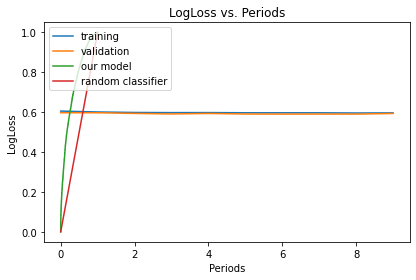

In [2]:
# 21889 / 2200 / 0.07 / 3.0 = 0.75 / 0.68
# without friendly no
#21889 / 2200 / 0.07 

from __future__ import print_function
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
#print(os.listdir("../input"))
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from itertools import combinations
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
from google.colab import drive
from functools import partial

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset
drive.mount('/content/drive')

rankings = pd.read_csv('/content/drive/MyDrive/soccer_data/test_data/fifa_ranking-2022-08-25.csv')
rankings = rankings.loc[:,['rank', 'country_full', 'country_abrv', 'cur_year_avg_weighted', 'rank_date', 
                           'two_year_ago_weighted', 'three_year_ago_weighted']]
#rankings = rankings.replace({"IR Iran": "Iran"}, regex=True, inplace=True)
rankings = rankings.replace({"IR Iran": "Iran"}, regex=True)
rankings['weighted_points'] =  rankings['cur_year_avg_weighted'] + rankings['two_year_ago_weighted'] + rankings['three_year_ago_weighted']
rankings['rank_date'] = pd.to_datetime(rankings['rank_date'])
rankings.head()

matches = pd.read_csv('/content/drive/MyDrive/soccer_data/test_data/results.csv', encoding='cp949')
matches =  matches.replace({'Germany DR': 'Germany', 'China': 'China PR', 'United States':'USA',"South Korea" : "Korea Republic"})
matches['date'] = pd.to_datetime(matches['date'])
matches.head()

world_cup = pd.read_csv('/content/drive/MyDrive/soccer_data/test_data/World Cup 2022 Dataset.csv')
world_cup = world_cup.loc[:, ['Team', 'Group', 'First match against', 'Second match against', 'Third match against']]
world_cup = world_cup.dropna(how='all')
world_cup = world_cup.replace({"IRAN": "Iran", 
                               "Costarica": "Costa Rica", 
                               "Korea" : "Korea Republic"})
world_cup = world_cup.set_index('Team')
world_cup.head()

# I want to have the ranks for every day 
rankings = rankings.set_index(['rank_date'])\
            .groupby(['country_full'], group_keys=False)\
            .resample('D').first()\
            .fillna(method='ffill')\
            .reset_index()
rankings.head()
# join the ranks
matches = matches.merge(rankings, 
                        left_on=['date', 'home_team'], 
                        right_on=['rank_date', 'country_full'])
matches = matches.merge(rankings, 
                        left_on=['date', 'away_team'], 
                        right_on=['rank_date', 'country_full'], 
                        suffixes=('_home', '_away'))
matches.head()

## 히트맵 출력
# fig, ax = plt.subplots()
# fig.set_size_inches(20, 20)
# corr1 = matches.corr()
# corr1
# sns.heatmap(corr1,annot=True)

# feature generation
matches['rank_difference'] = matches['rank_home'] - matches['rank_away']
matches['average_rank'] = (matches['rank_home'] + matches['rank_away'])/2
matches['point_difference'] = matches['weighted_points_home'] - matches['weighted_points_away']
matches['score_difference'] = matches['home_score'] - matches['away_score']
matches['is_won'] = matches['score_difference'] > 0 # take draw as lost
# matches['is_stake'] = matches['tournament']
matches['is_stake'] = matches['tournament'] != 'Friendly'



# I tried earlier rest days but it did not turn to be useful
# max_rest = 30
# matches['rest_days'] = matches.groupby('home_team').diff()['date'].dt.days.clip(0,max_rest).fillna(max_rest)



# I tried earlier the team as well but that did not make a difference either
matches['wc_participant'] = matches['home_team'] * matches['home_team'].isin(world_cup.index.tolist())
matches['wc_participant'] = matches['wc_participant'].replace({'':'Other'})
matches = matches.join(pd.get_dummies(matches['wc_participant']))
#matches.to_csv("out.csv")


print("matches len is :",len(matches))

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format
matches = matches.reindex(
       np.random.permutation(matches.index))

def preprocess_features(matches):
    
    selected_features = matches[["average_rank", "rank_difference", "point_difference", "is_stake"]]
    processed_features = selected_features.copy()
    return processed_features

def preprocess_targets(matches):
    output_targets = pd.DataFrame()
  # Scale the target to be in units of thousands of dollars.
    output_targets["is_won"] = matches['is_won']
    return output_targets

# Choose the first 60% i.e 10900 (out of 18167) examples for training.
training_examples = preprocess_features(matches.head(13133))
training_targets = preprocess_targets(matches.head(13133))

# Choose the last 40% i.e 7267 (out of 18167) examples for validation.
validation_examples = preprocess_features(matches.tail(8756))
validation_targets = preprocess_targets(matches.tail(8756))

Complete_Data_training = preprocess_features(matches)
Complete_Data_Validation = preprocess_targets(matches)

def construct_feature_columns(input_features):
    return set([tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features])
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a neural network model.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
     # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

def train_nn_classification_model(
    my_optimizer,
    steps,
    batch_size,
    hidden_units,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    periods = 10
    steps_per_period = steps / periods
  # Create a DNNRegressor object.
    #my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 3.0)

    my_optimizer = lambda:tf.keras.optimizers.SGD(lr=0.07, clipnorm=3.0)


    dnn_classifier = tf.estimator.DNNClassifier(
      feature_columns=construct_feature_columns(training_examples),
      hidden_units=hidden_units,
      optimizer=my_optimizer
  )
  # Create input functions.
    training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets["is_won"], 
                                          batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets["is_won"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
    predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["is_won"], 
                                                    num_epochs=1, 
                                                    shuffle=False)

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
    # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
    print("Training model...")
    print("LogLoss (on training data):")
    training_log_losses = []
    validation_log_losses = []
    for period in range (0, periods):
    # Train the model, starting from the prior state.
        print("Period[%s]" % (period+1))
        dnn_classifier.train(
          input_fn=training_input_fn,
          steps=steps_per_period
        )
        # Take a break and compute predictions.    
        training_probabilities = dnn_classifier.predict(input_fn=predict_training_input_fn)
        training_probabilities = np.array([item['probabilities'] for item in training_probabilities])
    
        validation_probabilities = dnn_classifier.predict(input_fn=predict_validation_input_fn)
        validation_probabilities = np.array([item['probabilities'] for item in validation_probabilities])
    
        training_log_loss = metrics.log_loss(training_targets, training_probabilities)
        validation_log_loss = metrics.log_loss(validation_targets, validation_probabilities)
    # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, training_log_loss))
    # Add the loss metrics from this period to our list.
        training_log_losses.append(training_log_loss)
        validation_log_losses.append(validation_log_loss)
    print("Model training finished.")
      # Output a graph of loss metrics over periods.
    plt.ylabel("LogLoss")
    plt.xlabel("Periods")
    plt.title("LogLoss vs. Periods")
    plt.tight_layout()
    plt.plot(training_log_losses, label="training")
    plt.plot(validation_log_losses, label="validation")
    plt.legend()

    return dnn_classifier

linear_classifier = train_nn_classification_model(
    my_optimizer=tf.compat.v1.train.AdagradOptimizer(learning_rate=0.07),
    steps=3000,
    batch_size=2200,
    hidden_units=[5, 5,6,5],
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)
predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                  validation_targets["is_won"], 
                                                  num_epochs=1, 
                                                  shuffle=False)


validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
# Get just the probabilities for the positive class.
validation_probabilities = np.array([item['probabilities'][1] for item in validation_probabilities])

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(
    validation_targets, validation_probabilities)
plt.plot(false_positive_rate, true_positive_rate, label="our model")
plt.plot([0, 1], [0, 1], label="random classifier")
_ = plt.legend(loc=2)


evaluation_metrics = linear_classifier.evaluate(input_fn=predict_validation_input_fn)

print("AUC on the validation set: %0.2f" % evaluation_metrics['auc'])
print("Accuracy on the validation set: %0.2f" % evaluation_metrics['accuracy'])

def train_complete_model(my_optimizer,
    steps,
    batch_size,
    hidden_units,
    Complete_Data_training,
    Complete_Data_Validation) :
    
    periods = 10
    steps_per_period = steps / periods
  # Create a DNNRegressor object.
    #my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 3.0)
    my_optimizer = lambda:tf.keras.optimizers.SGD(lr=0.07, clipnorm=3.0)
    dnn_classifier = tf.estimator.DNNClassifier(
      feature_columns=construct_feature_columns(Complete_Data_training),
      hidden_units=hidden_units,
      optimizer=my_optimizer
  )
    # Create input functions.
    Complete_training_input_fn = lambda: my_input_fn(Complete_Data_training, 
                                          Complete_Data_Validation["is_won"], 
                                          batch_size=batch_size)
    predict_Complete_training_input_fn = lambda: my_input_fn(Complete_Data_training, 
                                                  Complete_Data_Validation["is_won"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
    
    print("Training model...")
    print("LogLoss (on training data):")
    training_log_losses = []
    # validation_log_losses = []
    for period in range (0, periods):
    # Train the model, starting from the prior state.
        dnn_classifier.train(
        input_fn=Complete_training_input_fn,
        steps=steps_per_period
    )
        # Take a break and compute predictions.    
        Complete_training_probabilities = dnn_classifier.predict(input_fn=predict_Complete_training_input_fn)
        Complete_training_probabilities = np.array([item['probabilities'] for item in Complete_training_probabilities])
    
        
        training_log_loss = metrics.log_loss(Complete_Data_Validation, Complete_training_probabilities)
        #validation_log_loss = metrics.log_loss(Complete_Data_Validation, validation_probabilities)
    # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, training_log_loss))
    # Add the loss metrics from this period to our list.
        training_log_losses.append(training_log_loss)
        #validation_log_losses.append(validation_log_loss)
    print("Model training finished.")
      # Output a graph of loss metrics over periods.
    plt.ylabel("LogLoss")
    plt.xlabel("Periods")
    plt.title("LogLoss vs. Periods")
    plt.tight_layout()
    plt.plot(training_log_losses, label="training")
    #plt.plot(validation_log_losses, label="validation")
    plt.legend()

    return dnn_classifier
    
linear_classifier = train_complete_model(
    my_optimizer=tf.compat.v1.train.AdagradOptimizer(learning_rate=0.07),
    steps=3000,
    batch_size=2200,
    hidden_units=[5, 5,6,5],
    Complete_Data_training=Complete_Data_training,
    Complete_Data_Validation=Complete_Data_Validation)


# let's define a small margin when we safer to predict draw then win
margin = 0.05

# let's define the rankings at the time of the World Cup
world_cup_rankings = rankings.loc[(rankings['rank_date'] == rankings['rank_date'].max()) & 
                                    rankings['country_full'].isin(world_cup.index.unique())]
world_cup_rankings = world_cup_rankings.set_index(['country_full'])
world_cup_rankings.head()

# #테스트셋 확인
# X, y = matches.loc[:,['average_rank', 'rank_difference', 'point_difference', 'is_stake']], matches['is_won']
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42)

# logreg = linear_model.LogisticRegression(C=1e-5)
# features = PolynomialFeatures(degree=2)
# model = Pipeline([
#     ('polynomial_features', features),
#     ('logistic_regression', logreg)
# ])
# model = model.fit(X_train, y_train)


# #figures 
# fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# plt.figure(figsize=(15,5))
# ax = plt.subplot(1,3,1)
# ax.plot([0, 1], [0, 1], 'k--')
# ax.plot(fpr, tpr)
# ax.set_title('AUC score is {0:0.2}'.format(roc_auc_score(y_test, model.predict_proba(X_test)[:,1])))
# ax.set_aspect(1)

# ax = plt.subplot(1,3,2)
# cm = confusion_matrix(y_test, model.predict(X_test))
# ax.imshow(cm, cmap='Blues', clim = (0, cm.max())) 

# ax.set_xlabel('Predicted label')
# ax.set_title('Performance on the Test set')

# ax = plt.subplot(1,3,3)
# cm = confusion_matrix(y_train, model.predict(X_train))
# ax.imshow(cm, cmap='Blues', clim = (0, cm.max())) 
# ax.set_xlabel('Predicted label')
# ax.set_title('Performance on the Training set')
# pass

# #선형그래프
# features = ['average_rank', 'rank_difference', 'point_difference']
# wrongs = y_test != model.predict(X_test)

# for feature in features:
#     plt.figure()
#     plt.title(feature)
#     X_test.loc[wrongs, feature].plot.kde()
#     X.loc[:, feature].plot.kde()
#     plt.legend(['wrongs', 'all'])
    
# print("Stakes distribution in the wrong predictions")
# print(X_test.loc[wrongs, 'is_stake'].value_counts() / wrongs.sum())
# print("Stakes distribution overall")
# print(X['is_stake'].value_counts() / X.shape[0])

# # let's define a small margin when we safer to predict draw then win


margin = 0.05

# let's define the rankings at the time of the World Cup
world_cup_rankings = rankings.loc[(rankings['rank_date'] == rankings['rank_date'].max()) & 
                                    rankings['country_full'].isin(world_cup.index.unique())]
# print(world_cup_rankings,'\n')
world_cup_rankings = world_cup_rankings.set_index(['country_full'])

opponents = ['First match against', 'Second match against', 'Third match against']

world_cup['points'] = 0
world_cup['total_prob'] = 0

arr_country = ['Qatar','Ecuador','Senegal','Netherlands','England','Iran','USA','Wales','Argentina','Saudi Arabia','Mexico','Poland','France','Australia','Denmark','Tunisia','Spain','Costa Rica','Germany','Japan','Belgium','Canada','Morocco','Croatia','Brazil','Serbia','Switzerland','Cameroon','Portugal','Ghana','Uruguay','Korea Republic']

arr_predict = [[[[0 for l in range(4)] for k in range(8)]for j in range(4)]for i in range(8)]
# print(world_cup)
for i in range(32):
  home = arr_country[i]
  for j in range(32):
    away = arr_country[j]
    #print("{} vs. {}: ".format(home, away), end='')
    row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=validation_examples.columns)
    #print(world_cup_rankings.loc[home,])
    home_rank = world_cup_rankings.loc[home, 'rank']
    home_points = world_cup_rankings.loc[home, 'weighted_points']
    opp_rank = world_cup_rankings.loc[away, 'rank']
    opp_points = world_cup_rankings.loc[away, 'weighted_points']
    row['average_rank'] = (home_rank + opp_rank) / 2
    row['rank_difference'] = home_rank - opp_rank
    row['point_difference'] = home_points - opp_points
    row['is_won'] =np.nan
    predict_validation_input_fn1 = lambda: my_input_fn(row, 
                                              row["is_won"], 
                                              num_epochs=1, 
                                              shuffle=False)
    validation_probabilities1 = linear_classifier.predict(input_fn=predict_validation_input_fn1)
    # Get just the probabilities for the positive class.
    validation_probabilities1 = np.array([item['probabilities'][1] for item in validation_probabilities1])
    #print(validation_probabilities1[0])
    home_win_prob = validation_probabilities1[0]
    #print(str(int(i%8)*4 + int(i/8))+" vs. "+str(int(j%8) * 4 + int(j/8))+" / "+str(home_win_prob))

    arr_predict[int(i/4)][int(i%4)][int(j/4)][int(j%4)] = home_win_prob
  #print(' ')
    # world_cup.loc[home, 'total_prob'] += home_win_prob
    # world_cup.loc[away, 'total_prob'] += 1-home_win_prob
    
    # # if (home_rank - opp_rank) > 0 :
    # #   row['giant_kill'] = home_points - opp_points
    # points = 0
    # if home_win_prob <= 0.5 - margin:
    #     print("{} wins with {:.2f}".format(away, 1-home_win_prob))
    #     world_cup.loc[away, 'points'] += 3
    # if home_win_prob > 0.5 - margin:
    #     points = 1
    # if home_win_prob >= 0.5 + margin:
    #     points = 3
    #     world_cup.loc[home, 'points'] += 3
    #     print("{} wins with {:.2f}".format(home, home_win_prob))
    # if points == 1:
    #     print("Draw")
    #     world_cup.loc[home, 'points'] += 1
    #     world_cup.loc[away, 'points'] += 1



player_time = pd.read_csv('/content/drive/MyDrive/soccer_data/test_data/player_play_minuted.csv')
#코스타리카 누락
time_arr = player_time.values
# print(time_arr)

time_length = len(player_time)

player_stat = pd.read_csv('/content/drive/MyDrive/soccer_data/test_data/player_23.csv')
player_stat =  player_stat.replace({'Korea Republic': 'South Korea', 'IRAN': 'Iran'})
# Korea Republic -> Korea / IRAN -> Iran
stat_arr = player_stat.values
# print(stat_arr)


stat_length = len(player_stat)

country_get_power = [[0 for j in range(16)] for i in range(32)]
#주전 + 풀교체

arr_country = ['Qatar','Ecuador','Senegal','Netherlands','England','Iran','USA','Wales','Argentina','Saudi Arabia','Mexico','Poland','France','Australia','Denmark','Tunisia','Spain','Costa Rica','Germany','Japan','Belgium','Canada','Morocco','Croatia','Brazil','Serbia','Switzerland','Cameroon','Portugal','Ghana','Uruguay','Korea Republic']

country_injured = [[0 for j in range(26)] for i in range(32)]

player_cnt = [0 for i in range(32)]

for timlen in range(time_length):
  name_place = 0 # stat기준 위치 저장할 변수
  player_con_num = 0
  player_name = time_arr[timlen][0]
  player_age = time_arr[timlen][1]
  
  #국가 번호 매칭
  if(time_arr[timlen][3] == 'Qatar'):
    player_con_num = 0
  elif (time_arr[timlen][3] == 'Ecuador'):
    player_con_num = 1
  elif (time_arr[timlen][3] == 'Senegal'):
    player_con_num = 2
  elif (time_arr[timlen][3] == 'Netherlands'):
    player_con_num = 3
  elif (time_arr[timlen][3] == 'England'):
    player_con_num = 4
  elif (time_arr[timlen][3] == 'Iran'):
    player_con_num = 5
  elif (time_arr[timlen][3] == 'USA'):
    player_con_num = 6
  elif (time_arr[timlen][3] == 'Wales'):
    player_con_num = 7
  elif (time_arr[timlen][3] == 'Argentina'):
    player_con_num = 8
  elif (time_arr[timlen][3] == 'Saudi Arabia'):
    player_con_num = 9
  elif (time_arr[timlen][3] == 'Mexico'):
    player_con_num = 10
  elif (time_arr[timlen][3] == 'Poland'):
    player_con_num = 11
  elif (time_arr[timlen][3] == 'France'):
    player_con_num = 12
  elif (time_arr[timlen][3] == 'Australia'):
    player_con_num = 13
  elif (time_arr[timlen][3] == 'Denmark'):
    player_con_num = 14
  elif (time_arr[timlen][3] == 'Tunisia'):
    player_con_num = 15
  elif (time_arr[timlen][3] == 'Spain'):
    player_con_num = 16
  elif (time_arr[timlen][3] == 'Costa Rica'):
    player_con_num = 17
  elif (time_arr[timlen][3] == 'Germany'):
    player_con_num = 18
  elif (time_arr[timlen][3] == 'Japan'):
    player_con_num = 19
  elif (time_arr[timlen][3] == 'Belgium'):
    player_con_num = 20
  elif (time_arr[timlen][3] == 'Canada'):
    player_con_num = 21
  elif (time_arr[timlen][3] == 'Morocco'):
    player_con_num = 22
  elif (time_arr[timlen][3] == 'Croatia'):
    player_con_num = 23
  elif (time_arr[timlen][3] == 'Brazil'):
    player_con_num = 24
  elif (time_arr[timlen][3] == 'Serbia'):
    player_con_num = 25
  elif (time_arr[timlen][3] == 'Switzerland'):
    player_con_num = 26
  elif (time_arr[timlen][3] == 'Cameroon'):
    player_con_num = 27
  elif (time_arr[timlen][3] == 'Portugal'):
    player_con_num = 28
  elif (time_arr[timlen][3] == 'Ghana'):
    player_con_num = 29
  elif (time_arr[timlen][3] == 'Uruguay'):
    player_con_num = 30
  elif (time_arr[timlen][3] == 'South Korea'):
    player_con_num = 31

  
  if(player_cnt[player_con_num] < 16): # 해당 국가 명단이 16명 이하이고
    for comp_injure in range(26):
      if(player_name != country_injured[player_con_num][comp_injure]): # 부상자 명단에 없고
        for comp_name in range(stat_length):
          if((player_name == stat_arr[comp_name][1] ) and (player_age == (stat_arr[comp_name][9]))):
            #이름과 나이가 맞으면
            name_place = comp_name # 현재 위치를 저장하고
            country_get_power[player_con_num][player_cnt[player_con_num]] = stat_arr[comp_name][2]
            player_cnt[player_con_num] += 1
            time_arr[timlen][1] = 0 # 구분용 초기화
            #스탯 저장
            break
          elif((player_age == (stat_arr[comp_name][9])) and (time_arr[timlen][3] == stat_arr[comp_name][7])):
            name_place = comp_name # 현재 위치를 저장하고
            country_get_power[player_con_num][player_cnt[player_con_num]] = stat_arr[comp_name][2]
            player_cnt[player_con_num] += 1
            time_arr[timlen][1] = 0 # 구분용 초기화
            #스탯 저장
            break

        comp_name = 0
        comp_injure = 0
        break

country_avg_power = [0 for i in range(32)]

for i in range(32):
  for j in range(16):
    print(arr_country[i],' ',j,' ',country_get_power[i][j])
    country_avg_power[i] += country_get_power[i][j]
  country_avg_power[i] /= 16
  print(arr_country[i],' ',country_avg_power[i])
  print('')








print(' ')
tmp_predict = [[[[0 for l in range(4)] for k in range(8)]for j in range(4)]for i in range(8)]
for hteam in range(32):
  for ateam in range(32):
    if(hteam == ateam): #미러전이면 0.5
      tmp_predict[int(hteam/4)][int(hteam%4)][int(ateam/4)][int(ateam%4)]= 0.5
      
    elif(hteam == 0): #홈이 카타르인 경우 그대로
      tmp_predict[int(hteam/4)][int(hteam%4)][int(ateam/4)][int(ateam%4)] =  arr_predict[int(hteam/4)][int(hteam%4)][int(ateam/4)][int(ateam%4)]
    elif(ateam == 0): #어웨이가 카타르인 경우 홈이 카타르인 확률로
      tmp_predict[int(hteam/4)][int(hteam%4)][int(ateam/4)][int(ateam%4)]= (1-arr_predict[int(ateam/4)][int(ateam%4)][int(hteam/4)][int(hteam%4)])    

    elif(hteam == 9 and ateam == 5 ): #홈 사우디 어웨이 이란
      tmp_predict[int(hteam/4)][int(hteam%4)][int(ateam/4)][int(ateam%4)] = (arr_predict[int(hteam/4)][int(hteam%4)][int(ateam/4)][int(ateam%4)] + (1-arr_predict[int(ateam/4)][int(ateam%4)][int(hteam/4)][int(hteam%4)])) / 2     
    elif(hteam == 5 and ateam == 9 ): #홈 이란 어웨이 사우디
      tmp_predict[int(hteam/4)][int(hteam%4)][int(ateam/4)][int(ateam%4)] = (arr_predict[int(hteam/4)][int(hteam%4)][int(ateam/4)][int(ateam%4)] + (1-arr_predict[int(ateam/4)][int(ateam%4)][int(hteam/4)][int(hteam%4)])) / 2

    elif(hteam == 9 and ateam != 0): #홈이 사우디
      tmp_predict[int(hteam/4)][int(hteam%4)][int(ateam/4)][int(ateam%4)] =  arr_predict[int(hteam/4)][int(hteam%4)][int(ateam/4)][int(ateam%4)]
    elif(ateam == 9 and hteam != 0): #어웨이가 사우디
      tmp_predict[int(hteam/4)][int(hteam%4)][int(ateam/4)][int(ateam%4)]= (1-arr_predict[int(ateam/4)][int(ateam%4)][int(hteam/4)][int(hteam%4)])  

    elif(hteam == 5 and ateam != 0): #홈이 이란
      tmp_predict[int(hteam/4)][int(hteam%4)][int(ateam/4)][int(ateam%4)] =  arr_predict[int(hteam/4)][int(hteam%4)][int(ateam/4)][int(ateam%4)]
    elif(ateam == 5 and hteam != 0): #어웨이가 이란
      tmp_predict[int(hteam/4)][int(hteam%4)][int(ateam/4)][int(ateam%4)]= (1-arr_predict[int(ateam/4)][int(ateam%4)][int(hteam/4)][int(hteam%4)])  


    ## 이란 사우디 홈팀 승률로 변경
    else:#기타는 홈어웨이 평균치로
      tmp_predict[int(hteam/4)][int(hteam%4)][int(ateam/4)][int(ateam%4)] = (arr_predict[int(hteam/4)][int(hteam%4)][int(ateam/4)][int(ateam%4)] + (1-arr_predict[int(ateam/4)][int(ateam%4)][int(hteam/4)][int(hteam%4)])) / 2

for hteam in range(32):
  for ateam in range(32):   
    print(arr_country[hteam]+str(hteam)+" vs. "+arr_country[ateam]+str(ateam)+" / new: "+str(tmp_predict[int(hteam/4)][int(hteam%4)][int(ateam/4)][int(ateam%4)])+" / old home: "+str(arr_predict[int(hteam/4)][int(hteam%4)][int(ateam/4)][int(ateam%4)]) + " / old away: "+str(1-arr_predict[int(ateam%8)][int(ateam/8)][int(hteam%8)][int(hteam/8)])+' /  home wei'+str(world_cup_rankings.loc[arr_country[hteam], 'weighted_points'])+' / away wei: '+str(world_cup_rankings.loc[arr_country[ateam], 'weighted_points']))
    arr_predict[int(hteam/4)][int(hteam%4)][int(ateam/4)][int(ateam%4)] = tmp_predict[int(hteam/4)][int(hteam%4)][int(ateam/4)][int(ateam%4)]
  print(' ')


# arr = [[0 for j in range(cols)] for i in range(rows)]
arr_count_fs = [[0 for j in range(2)] for i in range(32)]
arr_groupwin = [[0 for j in range(2)] for i in range(32)]
for group_num in range(8):
  #??
  for round1 in range(2): # 그룹 내 1,2번 매치
    for round2 in range(2): # 그룹 내 1,3번 매치
      for round3 in range(2): # 그룹 내 1,4번 매치
        for round4 in range(2): # 그룹 내 2,3번 매치
          for round5 in range(2): # 그룹 내 2,4번 매치
            for round6 in range(2): # 그룹 내 3,4번 매치

              group_point = [0,0,0,0]
              this_round = 32*(round1) + 16*(round2) + 8*(round3) + 4*(round4) + 2*(round5) + 1*(round6)
              score_arr = [0,0,0,0]
              predict_arr = [0,0,0,0,0,0]

              if round1 == 0:
                predict_arr[0] += arr_predict[group_num][0][group_num][1]
                group_point[0] += 3
              elif round1 == 1 :
                predict_arr[0] += (1-arr_predict[group_num][0][group_num][1])
                group_point[1] += 3

              if round2 == 0:
                predict_arr[1] += arr_predict[group_num][0][group_num][2]
                group_point[0] += 3
              elif round2 == 1 :
                predict_arr[1] += (1-arr_predict[group_num][0][group_num][2])
                group_point[2] += 3

              if round3 == 0:
                predict_arr[2] += arr_predict[group_num][0][group_num][3]
                group_point[0] += 3
              elif round3 == 1 :
                predict_arr[2] += (1-arr_predict[group_num][0][group_num][3])
                group_point[3] += 3

              if round4 == 0:
                predict_arr[3] += arr_predict[group_num][1][group_num][2]
                group_point[1] += 3
              elif round4 == 1 :
                predict_arr[3] += (1-arr_predict[group_num][1][group_num][2])
                group_point[2] += 3

              if round5 == 0:
                predict_arr[4] += arr_predict[group_num][1][group_num][3]
                group_point[1] += 3
              elif round5 == 1 :
                predict_arr[4] += (1-arr_predict[group_num][1][group_num][3])
                group_point[3] += 3

              if round6 == 0:
                predict_arr[5] += arr_predict[group_num][2][group_num][3]
                group_point[2] += 3
              elif round6 == 1 :
                predict_arr[5] += (1-arr_predict[group_num][2][group_num][3])
                group_point[3] += 3
              
              
              #여기서 1,2등 체크하고 넘어가기?
              gfchk = [0,0,0,0] # 그룹 내 어떤 팀이 1등인지 확인
              gschk = [0,0,0,0]
              gfcnt = 0 #기존에 1등이 있는지 확인
              gscnt = 0

              gfirst = -1 # 1등의 승점
              gsecond = -1
              for cal in range(4):
                if(gfirst < group_point[cal]): # 기존 1등보다 승점이 높으면

                  if(gfcnt > 0): # 기존에 1등이 있었으면
                    gftmp = [0 for i in range(4)] #임시 저장 on

                    if(gscnt > 0): #기존에 2등이 있었으면
                      for gscle in range(4):
                        gschk[gscle] = 0 # 2등 로그 초기화
                        if(gfchk[gscle] == 1): #루프 돌리는 김에 기존 1등 몇팀인지 탐색
                          gschk[gscle] = 1 # 1등으로 바꾸기
                      gscnt = gfcnt # 1등팀 수를 2등팀수에 갈아끼우기
                      gsecond = gfirst # 기존 승점 갈아끼우기

                    elif(gscnt == 0): #기존에 2등팀이 없었으면
                      for gscle in range(4):
                        if(gfchk[gscle] == 1): #기존 1등인걸 찾으면
                          gschk[gscle] = 1
                      gscnt = gfcnt # 1등팀 수를 2등팀수에 갈아끼우기
                      gsecond = gfirst # 기존 승점 갈아끼우기

                    for gfcle in range(4): # 기존 1등 로그 지우기
                      gfchk[gfcle] = 0

                  #기존 1등 유무와 상관없는 공통 수행
                  #1등 승점 변경 / 1등 변경 / 1등 수 1명으로 변경
                  gfirst = group_point[cal]
                  gfchk[cal] = 1
                  gfcnt = 1

                elif(gfirst == group_point[cal]): #기존 1등이랑 점수가 같으면
                  gfchk[cal] = 1
                  gfcnt += 1

                else: # 1등보다 점수가 작은 경우
                  #label3
                  if(gsecond < group_point[cal]): # 기존 2등보다는 승점이 높을 때
                    if(gscnt > 0): #기존에 2등이 있었다면
                      for gscle in range(4): # 초기화하고
                        gschk[gscle] = 0
                    gsecond = group_point[cal] # 바꾸기
                    gschk[cal] = 1
                    gscnt = 1
                  elif(gsecond == group_point[cal]): #기존 2등과 승점이 같을 때
                    gschk[cal] = 1
                    gscnt += 1
                  

              #print('매치번호: '+str(group_num+1) + ' ' + str(this_round))
              
              # if(gfcnt == 1): # 단독 1등인 경우
              #   for fnd in range(4):
              #     if(gfchk[fnd]==1): # 어떤 팀이 1등인지 찾아서 승률 저장
              #       arr_groupwin[group_num*4+fnd][0] += predict_arr[0]*predict_arr[1]*predict_arr[2]*predict_arr[3]*predict_arr[4]*predict_arr[5]
              #       #print('1등: '+arr_country[group_num*4+rec_cnt])

              # elif(gfcnt > 1): #1등 동일승점이 많은 경우
              #   rec = [0 for j in range(gfcnt)] # 공동 1등 수 만큼 임시변수 생성
              #   rec_pred = [0 for j in range(gfcnt)]
              #   rec_wei = [0 for j in range(gfcnt)]
              #   rec_chk = 0
              #   sum_wei = 0
              #   for fnd in range(4): 
              #     if(gfchk[fnd]==1): # 1등인 국가 탐색
              #       rec[rec_chk] = fnd # 1등인 국가 저장
              #       rec_pred[rec_chk] = predict_arr[0]*predict_arr[1]*predict_arr[2]*predict_arr[3]*predict_arr[4]*predict_arr[5] # 해당 경우의수 확률 저장
              #       rec_wei[rec_chk] = world_cup_rankings.loc[arr_country[fnd], 'weighted_points'] # 가중치 불러오기
              #       sum_wei += world_cup_rankings.loc[arr_country[fnd], 'weighted_points'] # 가중치 합계 연산
              #       rec_chk += 1 # 체크용 변수 ++
              #   for rec_cnt in range(gfcnt):
              #     arr_groupwin[group_num*4+rec[rec_cnt]][0] += rec_pred[rec_cnt]*(rec_wei[rec_cnt]/sum_wei) # 1등인 확률 = 해당 경우의수 확률 * (동일 등수 가중치 비례)
              #     #print('1등: '+arr_country[group_num*4+rec_cnt])

              
              # if(gscnt == 1): # 2등이 한 팀인 경우
              #   for fnd in range(4):
              #     if(gschk[fnd]==1):
              #       arr_groupwin[group_num*4+fnd][1] += predict_arr[0]*predict_arr[1]*predict_arr[2]*predict_arr[3]*predict_arr[4]*predict_arr[5]
              #       #print('2등: '+arr_country[group_num*4+rec_cnt])

              # elif(gscnt > 1):
              #   rec = [0 for j in range(gscnt)]
              #   rec_pred = [0 for j in range(gscnt)]
              #   rec_wei = [0 for j in range(gscnt)]
              #   rec_chk = 0
              #   sum_wei = 0
              #   for fnd in range(4):
              #     if(gschk[fnd]==1):
              #       rec[rec_chk] = fnd
              #       rec_pred[rec_chk] = predict_arr[0]*predict_arr[1]*predict_arr[2]*predict_arr[3]*predict_arr[4]*predict_arr[5]
              #       rec_wei[rec_chk] = world_cup_rankings.loc[arr_country[fnd], 'weighted_points']
              #       sum_wei += world_cup_rankings.loc[arr_country[fnd], 'weighted_points']
              #       rec_chk += 1
              #   for rec_cnt in range(gscnt):
              #     arr_groupwin[group_num*4+rec[rec_cnt]][1] += rec_pred[rec_cnt]*(rec_wei[rec_cnt]/sum_wei)
              #     #print('2등: '+arr_country[group_num*4+rec_cnt])\
              # else:
              #   print('매치번호: '+str(group_num) + ' ' + str(round1)+str(round2)+str(round3)+str(round4)+str(round5)+str(round6)+" error "+str(group_point[0])+' '+str(group_point[1])+' '+str(group_point[2])+' '+str(group_point[3])+' ')

              rec = [0 for j in range(gfcnt)] # 1등 수 만큼 임시변수 생성
              rec_wei = [0 for j in range(gfcnt)]
              rec_chk = 0
              sum_wei = 0
              rec_pred = predict_arr[0]*predict_arr[1]*predict_arr[2]*predict_arr[3]*predict_arr[4]*predict_arr[5]
              for fnd in range(4): 
                if(gfchk[fnd]==1): # 1등인 국가 탐색
                  rec[rec_chk] = fnd # 1등인 국가 저장
                  #sum_wei += world_cup_rankings.loc[arr_country[fnd], 'weighted_points'] # 가중치 합계 연산
                  sum_wei += country_avg_power[(group_num*4 )+ fnd]
                  rec_chk += 1 # 체크용 변수 ++
              # for rec_cnt in range(gfcnt):
              #   arr_groupwin[group_num*4+rec[rec_cnt]][0] += rec_pred*(world_cup_rankings.loc[arr_country[rec[rec_cnt]], 'weighted_points']/sum_wei) # 1등인 확률 = 해당 경우의수 확률 * (동일 등수 가중치 비례)
              #   #print(chr(group_num+65)+'1등: '+arr_country[group_num*4+rec[rec_cnt]]+str(arr_groupwin[group_num*4+rec[rec_cnt]][0]))
              #   arr_count_fs[group_num*4+rec[rec_cnt]][0] += 1
              #   print(group_num*4+rec[rec_cnt])
              for fnd in range(4):
                if(gfchk[fnd]==1): # 1등인 국가 탐색
                  #arr_groupwin[group_num*4+fnd][1] += rec_pred*(world_cup_rankings.loc[arr_country[fnd], 'weighted_points']/sum_wei) # 1등인 확률 = 해당 경우의수 확률 * (동일 등수 가중치 비례)
                  arr_groupwin[group_num*4+fnd][0] += rec_pred*(country_avg_power[(group_num*4) + fnd]/sum_wei) # 1등인 확률 = 해당 경우의수 확률 * (동일 등수 가중치 비례)
                  #print(chr(group_num+65)+'1등: '+arr_country[group_num*4+rec[rec_cnt]]+str(arr_groupwin[group_num*4+rec[rec_cnt]][0]))
                  arr_count_fs[group_num*4+fnd][0] += 1

            

              rec = [0 for j in range(gscnt)]
              rec_wei = [0 for j in range(gscnt)]
              rec_chk = 0
              sum_wei = 0
              rec_pred = predict_arr[0]*predict_arr[1]*predict_arr[2]*predict_arr[3]*predict_arr[4]*predict_arr[5]
              for fnd in range(4):
                if(gschk[fnd]==1):
                  rec[rec_chk] = fnd
                  #sum_wei += world_cup_rankings.loc[arr_country[fnd], 'weighted_points'] # 가중치 합계 연산
                  sum_wei += country_avg_power[group_num*4 + fnd]
                  rec_chk += 1
              # for rec_cnt in range(gscnt):
              #   arr_groupwin[group_num*4+rec[rec_cnt]][1] += rec_pred*(world_cup_rankings.loc[arr_country[rec[rec_cnt]], 'weighted_points']/sum_wei)
              #   #print(chr(group_num+65)+'2등: '+arr_country[group_num*4+rec[rec_cnt]]+str(arr_groupwin[group_num*4+rec[rec_cnt]][1]))
              #   arr_count_fs[group_num*4+rec[rec_cnt]][1] += 1
              #   #print(group_num*4+rec[rec_cnt])
              for fnd in range(4):
                if(gschk[fnd]==1): # 1등인 국가 탐색
                  #arr_groupwin[group_num*4+fnd][1] += rec_pred*(world_cup_rankings.loc[arr_country[fnd], 'weighted_points']/sum_wei) # 1등인 확률 = 해당 경우의수 확률 * (동일 등수 가중치 비례)
                  arr_groupwin[group_num*4+fnd][1] += rec_pred*(country_avg_power[group_num*4 + fnd]/sum_wei) # 1등인 확률 = 해당 경우의수 확률 * (동일 등수 가중치 비례)
                  #print(chr(group_num+65)+'1등: '+arr_country[group_num*4+rec[rec_cnt]]+str(arr_groupwin[group_num*4+rec[rec_cnt]][0]))
                  arr_count_fs[group_num*4+fnd][1] += 1

# for i in range(32):
#   for j in range(2):
#     print(chr(i+65),' ',j+1,'등 : ',arr_country[i],' / ',arr_count_fs[i][j])

# sum_los = 0 #탈락확률 누계

print('')
sum_fir = 0;
sum_sec = 0;
for i in range(32):
  print(arr_country[i],'\t\t 조 1위 확률 :\t',arr_groupwin[i][0],'\t조 2위 확률 :\t',arr_groupwin[i][1])
  sum_fir += arr_groupwin[i][0]
  sum_sec += arr_groupwin[i][1]
  if((i+1)%4 == 0):
    print('---------------------------------------------------')
    print(chr(int((i+1)/4)+64),'조 1위 확률 :\t',sum_fir,'\t조 2위 확률 :\t',sum_sec)
    print(' ')
    sum_fir = 0
    sum_sec = 0


#좌 우 분할
#좌 : A0 B1 C0 D1 E0 F1 G0 H1
#우 : A1 B0 C1 D0 E1 F0 G1 H0

# 그룹 넘버 % 2 == 0 이면 조별 0
# 그룹 넘버 % 2 != 0 이면 조별 1

arr_round16 = [[[0 for k in range(2)] for j in range(2)] for i in range(32)] #16라운드 팀별 승패 확률
# arr_round16[team_num][left_right][win_lose]

for cut_match in range(8): # AB / CD / EF / GH 컷
  for cut_groupnum in range(4): # 0123 / 4567 컷
    #print(str(cut_match*4+cut_groupnum))
    for leri in range(2):
      if(cut_match%2 == 0): # A C E G
        for winlos in range(2):
          for opp in range(4):
            #print(str(int((cut_match*8+cut_groupnum)/4))+' '+str(int((cut_match*8+cut_groupnum)%4)) +' ' + str(cut_match*8+cut_groupnum) + '  vs  '+str(int(((cut_match+1)*8+opp)/4))+' '+ str(int(((cut_match+1)*8+opp)%4)) + ' '+str((cut_match+1)*8+opp))
            arr_round16[cut_match*4+cut_groupnum][winlos][0] += arr_groupwin[cut_match*4+cut_groupnum][winlos] * arr_groupwin[(cut_match+1)*4+opp][1-winlos] * arr_predict[cut_match][cut_groupnum][cut_match+1][opp] 
            arr_round16[cut_match*4+cut_groupnum][winlos][1] += arr_groupwin[cut_match*4+cut_groupnum][winlos] * arr_groupwin[(cut_match+1)*4+opp][1-winlos] * (1-arr_predict[cut_match][cut_groupnum][cut_match+1][opp])
            #print(str(cut_match*4+cut_groupnum)+' vs '+str((cut_match+1)*4+opp))
      else:
        for winlos in range(2):
          for opp in range(4):
            #print(str(int((cut_match*8+cut_groupnum)/4))+' '+str(int((cut_match*8+cut_groupnum)%4)) +' ' + str(cut_match*8+cut_groupnum) + '  vs  '+str(int(((cut_match+1)*8+opp)/4))+' '+ str(int(((cut_match+1)*8+opp)%4)) + ' '+str((cut_match+1)*8+opp))
            arr_round16[cut_match*4+cut_groupnum][winlos][0] += arr_groupwin[cut_match*4+cut_groupnum][winlos] * arr_groupwin[(cut_match-1)*4+opp][1-winlos] * arr_predict[cut_match][cut_groupnum][cut_match-1][opp]
            arr_round16[cut_match*4+cut_groupnum][winlos][1] += arr_groupwin[cut_match*4+cut_groupnum][winlos] * arr_groupwin[(cut_match-1)*4+opp][1-winlos] * (1-arr_predict[cut_match][cut_groupnum][cut_match-1][opp])
            #print(str(cut_match*4+cut_groupnum)+' vs '+str((cut_match-1)*4+opp))

sum_r16_winl = 0;
sum_r16_winr = 0;
sum_r16_losl = 0;
sum_r16_losr = 0;
for i in range(32):
  sum_r16_winl += arr_round16[i][0][0]
  sum_r16_winr += arr_round16[i][0][1]
  sum_r16_losl += arr_round16[i][1][0]
  sum_r16_losr += arr_round16[i][1][1]

sum_winl_dup = 0;
sum_winr_dup = 0;
sum_losl_dup = 0;
sum_losr_dup = 0;

for i in range(32):
  arr_round16[i][0][0] /= sum_r16_winl
  arr_round16[i][0][1] /= sum_r16_winr
  arr_round16[i][1][0] /= sum_r16_losl
  arr_round16[i][1][1] /= sum_r16_losr
  
  print(arr_country[i]+': 8강 진출확률L: '+str(arr_round16[i][0][0])+': 8강 진출확률R: '+str(arr_round16[i][1][0])+': 8강 진출확률avg: '+str((arr_round16[i][0][0]+arr_round16[i][1][0])/2)+': 16강 탈락 확률L: '+str(arr_round16[i][0][1])+': 16강 탈락 확률R: '+str(arr_round16[i][1][1])+': 16강 탈락 확률avg: '+str((arr_round16[i][0][1]+arr_round16[i][1][1])/2))
  sum_winl_dup += arr_round16[i][0][0]
  sum_winr_dup += arr_round16[i][0][1]
  sum_losl_dup += arr_round16[i][1][0]
  sum_losr_dup += arr_round16[i][1][1]
  if((i+1)%32 == 0):
    print('---------------------------------------------------')
    print('조 평균 8강 진출 확률L :\t',sum_winl_dup,'\t조 평균 8강 진출 확률R :\t',sum_winr_dup,'\t조 평균 8강 진출 확률avg :\t',(sum_winr_dup+sum_winl_dup)/2,'\t조 평균 16강 탈락 확률L :\t',sum_losl_dup,'\t조 평균 16강 탈락 확률R :\t',sum_losr_dup,'\t조 평균 16강 탈락 확률avg :\t',(sum_losr_dup+sum_losl_dup)/2)
    print(' ')
    sum_winl_dup = 0;
    sum_winr_dup = 0;
    sum_losl_dup = 0;
    sum_losr_dup = 0;

arr_round8 = [[[0 for k in range(2)] for j in range(2)] for i in range(32)] #8라운드 팀별 승패 확률

for cut_match in range(4): 
  for cut_groupnum in range(8):
    #print(str(cut_match*8+cut_groupnum))
    if(cut_match%2 == 0):
      for winlos in range(2):
        for opp in range(8):
          #print(str(int((cut_match*8+cut_groupnum)/4))+' '+str(int((cut_match*8+cut_groupnum)%4)) +' ' + str(cut_match*8+cut_groupnum) + '  vs  '+str(int(((cut_match+1)*8+opp)/4))+' '+ str(int(((cut_match+1)*8+opp)%4)) + ' '+str((cut_match+1)*8+opp)) 
          arr_round8[cut_match*8+cut_groupnum][winlos][0] += arr_round16[cut_match*8+cut_groupnum][winlos][0] * arr_round16[(cut_match+1)*8+opp][winlos][0] * arr_predict[int((cut_match*8+cut_groupnum)/4)][int((cut_match*8+cut_groupnum)%4)][int(((cut_match+1)*8+opp)/4)][int(((cut_match+1)*8+opp)%4)]
          arr_round8[cut_match*8+cut_groupnum][winlos][1] += arr_round16[cut_match*8+cut_groupnum][winlos][0] * arr_round16[(cut_match+1)*8+opp][winlos][0] * (1-arr_predict[int((cut_match*8+cut_groupnum)/4)][int((cut_match*8+cut_groupnum)%4)][int(((cut_match+1)*8+opp)/4)][int(((cut_match+1)*8+opp)%4)])
    else:
      for winlos in range(2):
        for opp in range(8):
          #print(str(int((cut_match*8+cut_groupnum)/4))+' '+str(int((cut_match*8+cut_groupnum)%4)) +' ' + str(cut_match*8+cut_groupnum) + '  vs  '+str(int(((cut_match-1)*8+opp)/4))+' '+ str(int(((cut_match-1)*8+opp)%4)) + ' '+str((cut_match-1)*8+opp))
          arr_round8[cut_match*8+cut_groupnum][winlos][0] += arr_round16[cut_match*8+cut_groupnum][winlos][0] * arr_round16[(cut_match-1)*8+opp][winlos][0] * arr_predict[int((cut_match*8+cut_groupnum)/4)][int((cut_match*8+cut_groupnum)%4)][int(((cut_match-1)*8+opp)/4)][int(((cut_match-1)*8+opp)%4)]
          arr_round8[cut_match*8+cut_groupnum][winlos][1] += arr_round16[cut_match*8+cut_groupnum][winlos][0] * arr_round16[(cut_match-1)*8+opp][winlos][0] * (1-arr_predict[int((cut_match*8+cut_groupnum)/4)][int((cut_match*8+cut_groupnum)%4)][int(((cut_match-1)*8+opp)/4)][int(((cut_match-1)*8+opp)%4)])



sum_r8_winl = 0;
sum_r8_winr = 0;
sum_r8_losl = 0;
sum_r8_losr = 0;
for i in range(32):
  sum_r8_winl += arr_round8[i][0][0]
  sum_r8_winr += arr_round8[i][0][1]
  sum_r8_losl += arr_round8[i][1][0]
  sum_r8_losr += arr_round8[i][1][1]

sum_winl_dup = 0;
sum_winr_dup = 0;
sum_losl_dup = 0;
sum_losr_dup = 0;

for i in range(32):
  arr_round8[i][0][0] /= sum_r8_winl
  arr_round8[i][0][1] /= sum_r8_winr
  arr_round8[i][1][0] /= sum_r8_losl
  arr_round8[i][1][1] /= sum_r8_losr
  
  print(arr_country[i]+': 4강 진출확률L: '+str(arr_round8[i][0][0])+': 4강 진출확률R: '+str(arr_round8[i][1][0])+': 4강 진출확률avg: '+str((arr_round8[i][0][0]+arr_round8[i][1][0])/2)+': 8강 탈락 확률L: '+str(arr_round8[i][0][1])+': 8강 탈락 확률R: '+str(arr_round8[i][1][1])+': 8강 탈락 확률avg: '+str((arr_round8[i][0][1]+arr_round8[i][1][1])/2))
  sum_winl_dup += arr_round8[i][0][0]
  sum_winr_dup += arr_round8[i][0][1]
  sum_losl_dup += arr_round8[i][1][0]
  sum_losr_dup += arr_round8[i][1][1]
  if((i+1)%32 == 0):
    print('---------------------------------------------------')
    print('조 평균 4강 진출 확률L :\t',sum_winl_dup,'\t조 평균 4강 진출 확률R :\t',sum_winr_dup,'\t조 평균 4강 진출 확률avg :\t',(sum_winr_dup+sum_winl_dup)/2,'\t조 평균 8강 탈락 확률L :\t',sum_losl_dup,'\t조 평균 8강 탈락 확률R :\t',sum_losr_dup,'\t조 평균 8강 탈락 확률avg :\t',(sum_losr_dup+sum_losl_dup)/2)
    print(' ')
    sum_winl_dup = 0;
    sum_winr_dup = 0;
    sum_losl_dup = 0;
    sum_losr_dup = 0;


arr_round4 = [[[0 for k in range(2)] for j in range(2)] for i in range(32)] #4라운드 팀별 승패 확률

for cut_match in range(2): 
  for cut_groupnum in range(16):
    #print(str(cut_match*16+cut_groupnum))
    if(cut_match%2 == 0): # A C E G
      for winlos in range(2):
        for opp in range(16):
          #print(str(int((cut_match*16+cut_groupnum)/4))+' '+str(int((cut_match*16+cut_groupnum)%4)) +' ' + str(cut_match*16+cut_groupnum) + '  vs  '+str(int(((cut_match+1)*16+opp)/4))+' '+ str(int(((cut_match+1)*16+opp)%4)) + ' '+str((cut_match+1)*16+opp)) 
          #print(str(int((cut_match*16+cut_groupnum)%8))+' '+str(int((cut_match*16+cut_groupnum)/8)) +' ' + str(cut_match*16+cut_groupnum) + '  vs  '+str(int(((cut_match+1)*16+opp)%8))+' '+ str(int(((cut_match+1)*16+opp)/8)) + ' '+str((cut_match+1)*16+opp)) 
          arr_round4[cut_match*16+cut_groupnum][winlos][0] += arr_round8[cut_match*16+cut_groupnum][winlos][0] * arr_round8[(cut_match+1)*16+opp][winlos][0] * arr_predict[int((cut_match*16+cut_groupnum)%8)][int((cut_match*16+cut_groupnum)/8)][int(((cut_match+1)*16+opp)%8)][int(((cut_match+1)*16+opp)/8)]
          arr_round4[cut_match*16+cut_groupnum][winlos][1] += arr_round8[cut_match*16+cut_groupnum][winlos][0] * arr_round8[(cut_match+1)*16+opp][winlos][0] * (1-arr_predict[int((cut_match*16+cut_groupnum)%8)][int((cut_match*16+cut_groupnum)/8)][int(((cut_match+1)*16+opp)%8)][int(((cut_match+1)*16+opp)/8)])
    else:
      for winlos in range(2):
        for opp in range(16):
          #print(str(int((cut_match*16+cut_groupnum)/4))+' '+str(int((cut_match*16+cut_groupnum)%4)) +' ' + str(cut_match*16+cut_groupnum) + '  vs  '+str(int(((cut_match-1)*16+opp)/4))+' '+ str(int(((cut_match-1)*16+opp)%4)) + ' '+str((cut_match-1)*16+opp))
          #print(str(int((cut_match*16+cut_groupnum)/4))+' '+str(int((cut_match*16+cut_groupnum)%4)) +' ' + str(cut_match*16+cut_groupnum) + '  vs  '+str(int(((cut_match-1)*16+opp)/4))+' '+ str(int(((cut_match-1)*16+opp)%4)) + ' '+str((cut_match-1)*16+opp))
          arr_round4[cut_match*16+cut_groupnum][winlos][0] += arr_round8[cut_match*16+cut_groupnum][winlos][0] * arr_round8[(cut_match-1)*16+opp][winlos][0] * arr_predict[int((cut_match*16+cut_groupnum)%8)][int((cut_match*16+cut_groupnum)/8)][int(((cut_match-1)*16+opp)%8)][int(((cut_match-1)*16+opp)/8)]
          arr_round4[cut_match*16+cut_groupnum][winlos][1] += arr_round8[cut_match*16+cut_groupnum][winlos][0] * arr_round8[(cut_match-1)*16+opp][winlos][0] * (1-arr_predict[int((cut_match*16+cut_groupnum)%8)][int((cut_match*16+cut_groupnum)/8)][int(((cut_match-1)*16+opp)%8)][int(((cut_match-1)*16+opp)/8)])


sum_r4_winl = 0;
sum_r4_winr = 0;
sum_r4_losl = 0;
sum_r4_losr = 0;
for i in range(32):
  sum_r4_winl += arr_round4[i][0][0]
  sum_r4_winr += arr_round4[i][0][1]
  sum_r4_losl += arr_round4[i][1][0]
  sum_r4_losr += arr_round4[i][1][1]

sum_winl_dup = 0;
sum_winr_dup = 0;
sum_losl_dup = 0;
sum_losr_dup = 0;

for i in range(32):
  arr_round4[i][0][0] /= sum_r4_winl
  arr_round4[i][0][1] /= sum_r4_winr
  arr_round4[i][1][0] /= sum_r4_losl
  arr_round4[i][1][1] /= sum_r4_losr
  print(arr_country[i]+': 결승 진출확률L: '+str(arr_round4[i][0][0])+': 결승 진출확률R: '+str(arr_round4[i][1][0])+': 결승 진출확률avg: '+str((arr_round4[i][0][0]+arr_round4[i][1][0])/2)+': 3,4위전 진출 확률L: '+str(arr_round4[i][0][1])+': 3,4위전 진출 확률R: '+str(arr_round4[i][1][1])+': 3,4위전 진출 확률avg: '+str((arr_round4[i][0][1]+arr_round4[i][1][1])/2))
  sum_winl_dup += arr_round4[i][0][0]
  sum_winr_dup += arr_round4[i][0][1]
  sum_losl_dup += arr_round4[i][1][0]
  sum_losr_dup += arr_round4[i][1][1]
  if((i+1)%32 == 0):
    print('---------------------------------------------------')
    print('조 평균 결승 진출 확률L :\t',sum_winl_dup,'\t조 평균 결승 진출 확률R :\t',sum_winr_dup,'\t조 평균 결승 진출 확률avg :\t',(sum_winl_dup+sum_winr_dup)/2,'\t조 평균 3,4위전 진출 확률L :\t',sum_losl_dup,'\t조 평균 3,4위전 진출 확률R :\t',sum_losr_dup,'\t조 평균 3,4위전 진출 확률avg :\t',(sum_losl_dup+sum_losr_dup)/2)
    print(' ')
    sum_winl_dup = 0;
    sum_winr_dup = 0;
    sum_losl_dup = 0;
    sum_losr_dup = 0;
  
arr_rank = [[0 for j in range(2)] for i in range(32)] #결승 팀별 승패 확률 -> 1등 2등 3등 4등 확률

#여기서는 rank[n][0] / [n][1]만 판명 -> 결승
for cut_groupnum in range(32):
#     print(str(cut_match*8+cut_groupnum))
  if(cut_match%2 == 0): # A C E G
    for winlos in range(2):
      for opp in range(32):
        if(cut_groupnum != opp):
          arr_rank[cut_groupnum][0] += arr_round4[cut_groupnum][winlos][1] * arr_round4[opp][1-winlos][1] * arr_predict[int((cut_groupnum)%8)][int((cut_groupnum)/8)][int((opp)%8)][int((opp)/8)]
          arr_rank[cut_groupnum][1] += arr_round4[cut_groupnum][winlos][1] * arr_round4[opp][1-winlos][1] * (1-arr_predict[int((cut_groupnum)%8)][int((cut_groupnum)/8)][int((opp)%8)][int((opp)/8)])
  else:
    for winlos in range(2):
      for opp in range(32):
        if(cut_groupnum != opp):
          arr_rank[cut_groupnum][0] += arr_round4[cut_groupnum][winlos][1] * arr_round4[opp][1-winlos][1] * arr_predict[int((cut_groupnum)%8)][int((cut_groupnum)/8)][int((opp)%8)][int((opp)/8)]
          arr_rank[cut_groupnum][1] += arr_round4[cut_groupnum][winlos][1] * arr_round4[opp][1-winlos][1] * (1-arr_predict[int((cut_groupnum)%8)][int((cut_groupnum)/8)][int((opp)%8)][int((opp)/8)])



sum_ran_fir = 0;
sum_ran_sec = 0;
for i in range(32):
  sum_ran_fir += arr_rank[i][0]
  sum_ran_sec += arr_rank[i][1]

sum_fir_dup = 0
sum_sec_dup = 0
for i in range(32):
  arr_rank[i][0] /= sum_ran_fir
  arr_rank[i][1] /= sum_ran_sec
  print(arr_country[i]+': 3등 확률: '+str(arr_rank[i][0])+' / 4등 확률: '+str(arr_rank[i][1]))
  sum_fir_dup += arr_rank[i][0]
  sum_sec_dup += arr_rank[i][1]
  if((i+1)%32 == 0):
    print('---------------------------------------------------')
    print('조 평균 3등 확률 :\t',sum_fir_dup,'\t조 평균 4등 확률 :\t',sum_sec_dup)
    print(' ')
    sum_fir_dup = 0
    sum_sec_dup = 0


arr_final = [[0 for j in range(2)] for i in range(32)] #결승 팀별 승패 확률 -> 1등 2등 3등 4등 확률

#여기서는 rank[n][0] / [n][1]만 판명 -> 결승
for cut_groupnum in range(32):
#     print(str(cut_match*8+cut_groupnum))
  if(cut_match%2 == 0): # A C E G
    for winlos in range(2):
      for opp in range(32):
        if(cut_groupnum != opp):
          arr_final[cut_groupnum][0] += arr_round4[cut_groupnum][winlos][0] * arr_round4[opp][1-winlos][0] * arr_predict[int((cut_groupnum)%8)][int((cut_groupnum)/8)][int((opp)%8)][int((opp)/8)]
          arr_final[cut_groupnum][1] += arr_round4[cut_groupnum][winlos][0] * arr_round4[opp][1-winlos][0] * (1-arr_predict[int((cut_groupnum)%8)][int((cut_groupnum)/8)][int((opp)%8)][int((opp)/8)])
  else:
    for winlos in range(2):
      for opp in range(32):
        if(cut_groupnum != opp):
          arr_final[cut_groupnum][0] += arr_round4[cut_groupnum][winlos][0] * arr_round4[opp][1-winlos][0] * arr_predict[int((cut_groupnum)%8)][int((cut_groupnum)/8)][int((opp)%8)][int((opp)/8)]
          arr_final[cut_groupnum][1] += arr_round4[cut_groupnum][winlos][0] * arr_round4[opp][1-winlos][0] * (1-arr_predict[int((cut_groupnum)%8)][int((cut_groupnum)/8)][int((opp)%8)][int((opp)/8)])

sum_fin_fir = 0;
sum_fin_sec = 0;
for i in range(32):
  sum_fin_fir += arr_final[i][0]
  sum_fin_sec += arr_final[i][1]

sum_fir_dup = 0
sum_sec_dup = 0
for i in range(32):
  arr_final[i][0] /= sum_fin_fir
  arr_final[i][1] /= sum_fin_sec
  print(arr_country[i]+': 우승 확률: '+str(arr_final[i][0])+' / 준우승 확률: '+str(arr_final[i][1]))
  sum_fir_dup += arr_final[i][0]
  sum_sec_dup += arr_final[i][1]
  if((i+1)%32 == 0):
    print('---------------------------------------------------')
    print('조 평균 우승 확률 :\t',sum_fir_dup,'\t조 평균 준우승 확률 :\t',sum_sec_dup)
    print(' ')
    sum_fir_dup = 0
    sum_sec_dup = 0

out_result_csv = pd.DataFrame
(
    [
      'Country_name',
       
    ]
)
out_result = [[0 for country in range(59)] for data in range(33)]
out_result[0][0] = 'country_number'
out_result[0][1] = 'country_name'
for i in range(32):
  out_result[0][i+2] = 'vs '+ arr_country[i]
out_result[0][34] = '1_in_group' 
out_result[0][35] = '2_in_group'
out_result[0][36] = 'go_to_r16' #[33]+[34]

out_result[0][37] = 'go_to_r8_in_left'
out_result[0][38] = 'go_to_r8_in_right'
out_result[0][39] = 'go_to_r8' #36+37
out_result[0][40] = 'fail_in_r16_left' 
out_result[0][41] = 'fail_in_r16_right'
out_result[0][42] = 'fail_in_r16' # 39 + 40

out_result[0][43] = 'go_to_r4_in_left'
out_result[0][44] = 'go_to_r4_in_right'
out_result[0][45] = 'go_to_r4' #42+43
out_result[0][46] = 'fail_in_r8_left' 
out_result[0][47] = 'fail_in_r8_right'
out_result[0][48] = 'fail_in_r8' # 45 + 46

out_result[0][49] = 'go_to_final_in_left'
out_result[0][50] = 'go_to_final_in_right'
out_result[0][51] = 'go_to_final' #48+49
out_result[0][52] = 'go_to_rank_in_left'
out_result[0][53] = 'go_to_rank_in_right'
out_result[0][54] = 'go_to_rank' #51+52

out_result[0][55] = '3_in_rank'
out_result[0][56] = '4_in_rank'
out_result[0][57] = '1_in_final'
out_result[0][58] = '2_in_final'



for i in range(32):
  out_result[i+1][0] = i+1
  out_result[i+1][1] = arr_country[i]



sum_group = [0 for j in range(32)]
for i in range(32):
  for j in range(32):
    out_result[i+1][j+2] = arr_predict[int(i/4)][i%4][int(j/4)][j%4]

sum_group_win = [0 for i in range(32)]
for i in range(32):
  for j in range(2):
    out_result[i+1][j+34] = arr_groupwin[i][j]
    sum_group_win[i] += arr_groupwin[i][j]

for i in range(32):
  out_result[i+1][36] = sum_group_win[i]
  



sum_r16_win = [0 for i in range(32)]
for i in range(32):
  for k in range(2):
    out_result[i+1][k+37] = arr_round16[i][k][0]
    sum_r16_win[i] += arr_round16[i][k][0]
for i in range(32):
  out_result[i+1][39] = sum_r16_win[i]

sum_r16_los = [0 for i in range(32)]
for i in range(32):
  for k in range(2):
    out_result[i+1][k+40] = arr_round16[i][k][1]
    sum_r16_los[i] += arr_round16[i][k][1]
for i in range(32):
  out_result[i+1][42] = sum_r16_los[i]



sum_r8_win = [0 for i in range(32)]
for i in range(32):
  for k in range(2):
    out_result[i+1][k+43] = arr_round8[i][k][0]
    sum_r8_win[i] += arr_round8[i][k][0]
for i in range(32):
  out_result[i+1][45] = sum_r8_win[i]

sum_r8_los = [0 for i in range(32)]
for i in range(32):
  for k in range(2):
    out_result[i+1][k+46] = arr_round8[i][k][1]
    sum_r8_los[i] += arr_round8[i][k][1]
for i in range(32):
  out_result[i+1][48] = sum_r8_los[i]


sum_r4_win = [0 for i in range(32)]
for i in range(32):
  for k in range(2):
    out_result[i+1][k+49] = arr_round4[i][k][0]
    sum_r4_win[i] += arr_round4[i][k][0]
for i in range(32):
  out_result[i+1][51] = sum_r4_win[i]

sum_r4_los = [0 for i in range(32)]
for i in range(32):
  for k in range(2):
    out_result[i+1][k+52] = arr_round4[i][k][1]
    sum_r4_los[i] += arr_round4[i][k][1]
for i in range(32):
  out_result[i+1][54] = sum_r4_los[i]


for i in range(32):
    out_result[i+1][55] = arr_rank[i][0]

for i in range(32):
    out_result[i+1][56] = arr_rank[i][1]

for i in range(32):
    out_result[i+1][57] = arr_final[i][0]

for i in range(32):
    out_result[i+1][58] = arr_final[i][1]

#print(out_result)

out_result_csv = pd.DataFrame(out_result)
from datetime import datetime

now = datetime.now()

out_result_csv.to_csv('/content/drive/MyDrive/soccer_data/result/dnn_acc_result_'+now.strftime('%y_%m_%d_%H_%M_%S')+'.csv', header=False, index=False)